C:\Users\sjtri\AppData\Local\Temp\ipykernel_17824\3858797768.py:8: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_path,
C:\Users\sjtri\AppData\Local\Temp\ipykernel_17824\3858797768.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(file_path,
C:\Users\sjtri\AppData\Local\Temp\ipykernel_17824\3858797768.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(file_path,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB
None
             datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 

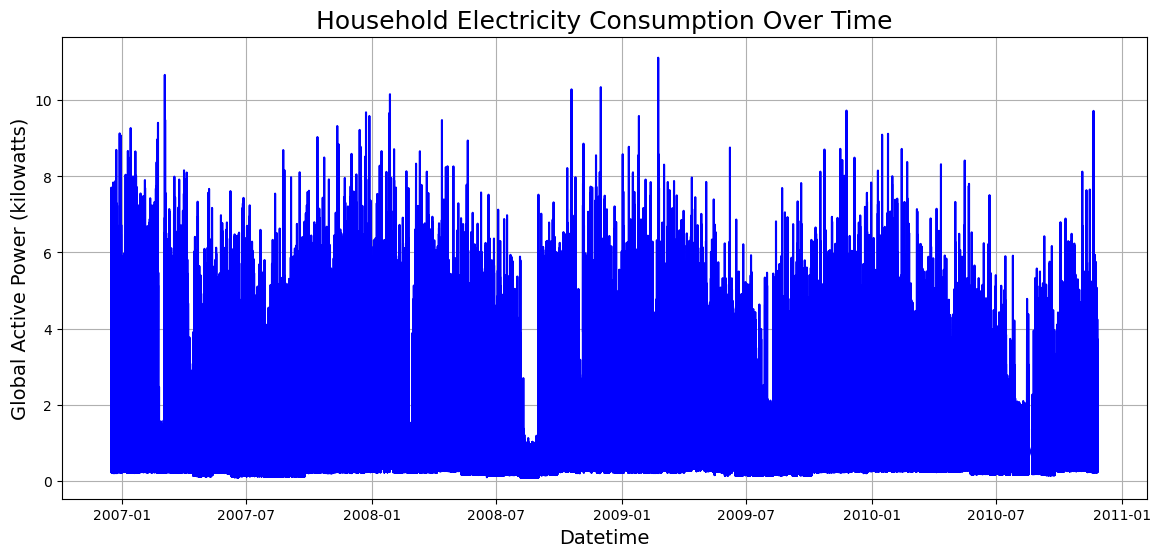

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = "C:/Users/sjtri/OneDrive/Documents/Data Analytics/Global Electricity Consumption/household_power_consumption.txt"

df = pd.read_csv(file_path, 
                 sep=';', 
                 parse_dates={'datetime': ['Date', 'Time']},
                 infer_datetime_format=True, 
                 na_values=['?'],
                 low_memory=False)

print(df.info())
print(df.head())

df.dropna(inplace=True)
print('dfdf')
# Convert numeric columns
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
        'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[cols] = df[cols].astype(float)

df['date'] = df['datetime'].dt.date
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['weekday'] = df['datetime'].dt.day_name()


# Plot Global Active Power Over Time
plt.figure(figsize=(14,6))
sns.lineplot(x=df['datetime'], y=df['Global_active_power'], color="blue")
plt.title('Household Electricity Consumption Over Time', fontsize=18)
plt.xlabel('Datetime', fontsize=14)
plt.ylabel('Global Active Power (kilowatts)', fontsize=14)
plt.grid(True)
plt.show()



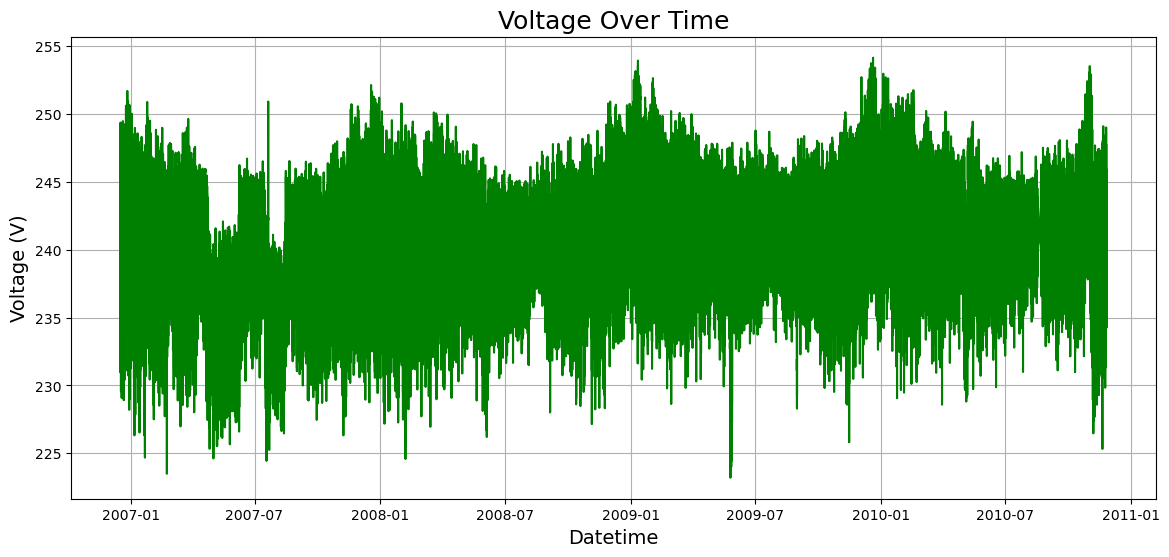

In [3]:
# Plot Voltage Over Time
plt.figure(figsize=(14,6))
sns.lineplot(x=df['datetime'], y=df['Voltage'], color="green")
plt.title('Voltage Over Time', fontsize=18)
plt.xlabel('Datetime', fontsize=14)
plt.ylabel('Voltage (V)', fontsize=14)
plt.grid(True)
plt.show()



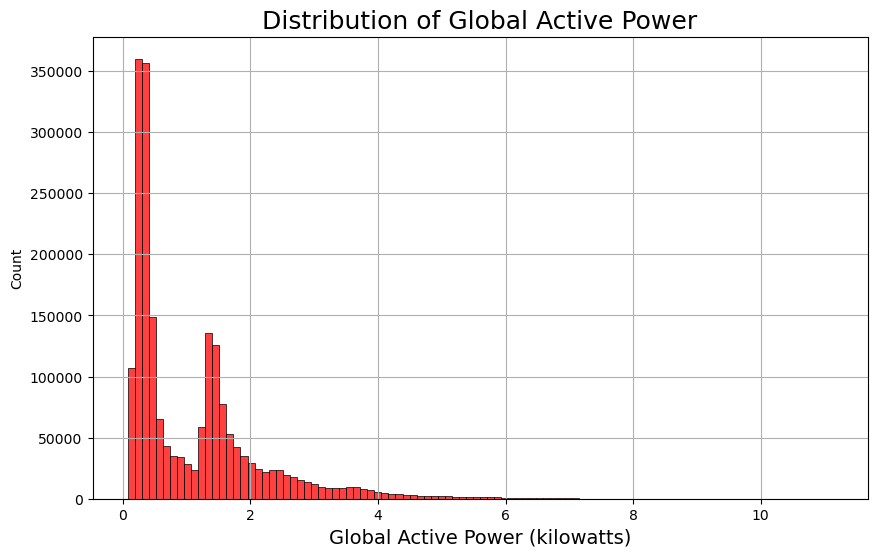

In [4]:
# Plot Distribution of Active Power
plt.figure(figsize=(10,6))
sns.histplot(df['Global_active_power'], bins=100, color="red")
plt.title('Distribution of Global Active Power', fontsize=18)
plt.xlabel('Global Active Power (kilowatts)', fontsize=14)
plt.grid(True)
plt.show()




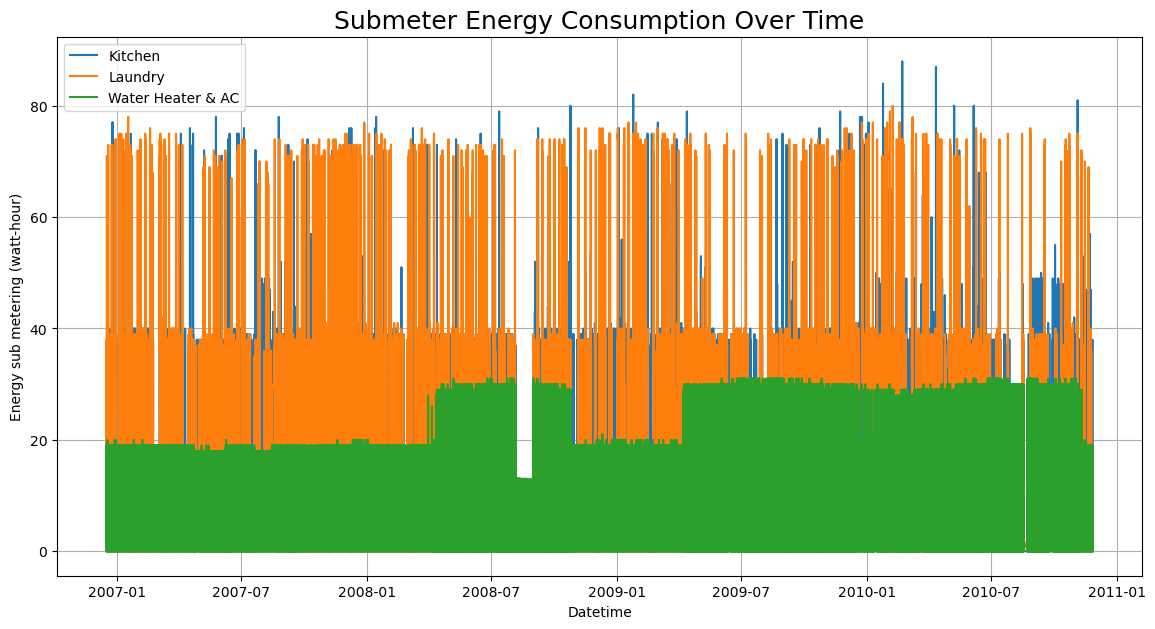

In [5]:
# Plot Sub Metering Comparison
plt.figure(figsize=(14,7))
plt.plot(df['datetime'], df['Sub_metering_1'], label='Kitchen')
plt.plot(df['datetime'], df['Sub_metering_2'], label='Laundry')
plt.plot(df['datetime'], df['Sub_metering_3'], label='Water Heater & AC')
plt.legend()
plt.title('Submeter Energy Consumption Over Time', fontsize=18)
plt.xlabel('Datetime')
plt.ylabel('Energy sub metering (watt-hour)')
plt.grid(True)
plt.show()




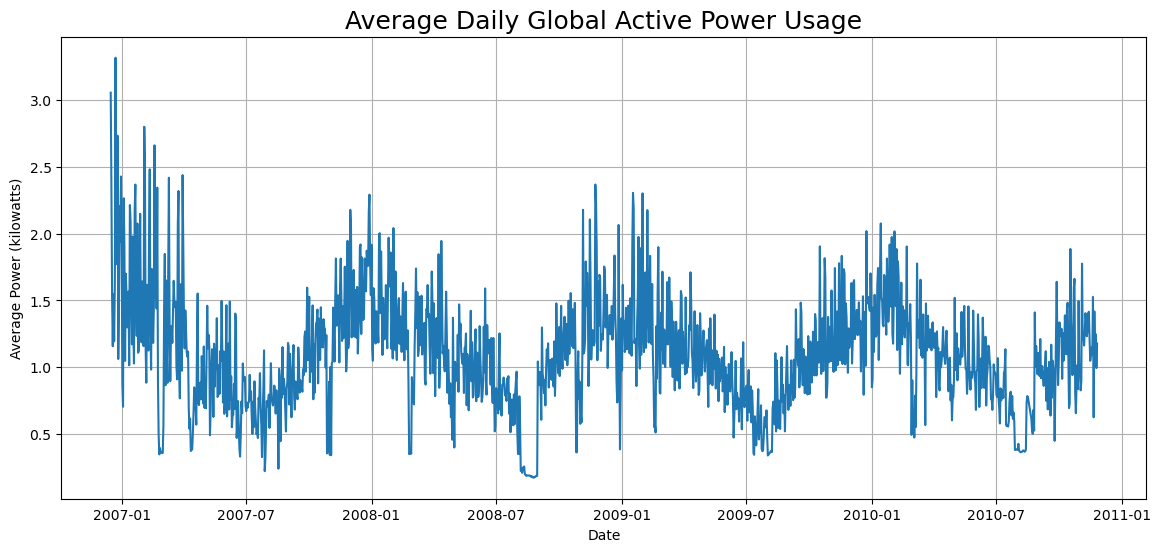

In [6]:
# Plot Average Daily Power Consumption
daily_power = df.groupby('date')['Global_active_power'].mean()
plt.figure(figsize=(14,6))
daily_power.plot()
plt.title('Average Daily Global Active Power Usage', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Average Power (kilowatts)')
plt.grid(True)
plt.show()



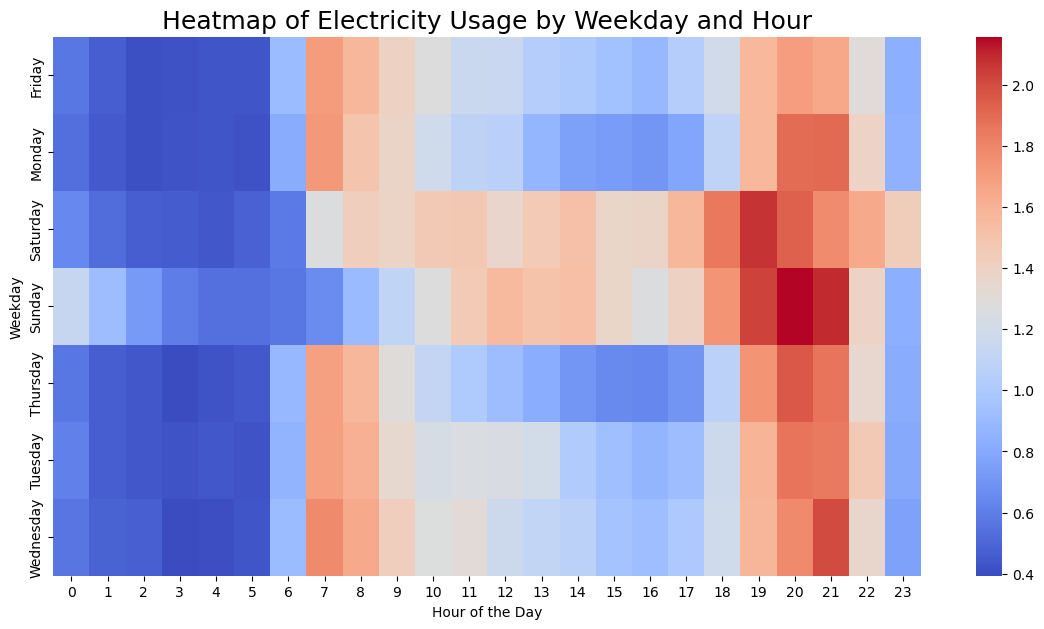

In [7]:
# Plot Heatmap of Hourly Consumption
pivot_table = df.pivot_table(values='Global_active_power', index=df['weekday'], columns=df['hour'], aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot_table, cmap="coolwarm")
plt.title('Heatmap of Electricity Usage by Weekday and Hour', fontsize=18)
plt.xlabel('Hour of the Day')
plt.ylabel('Weekday')
plt.show()




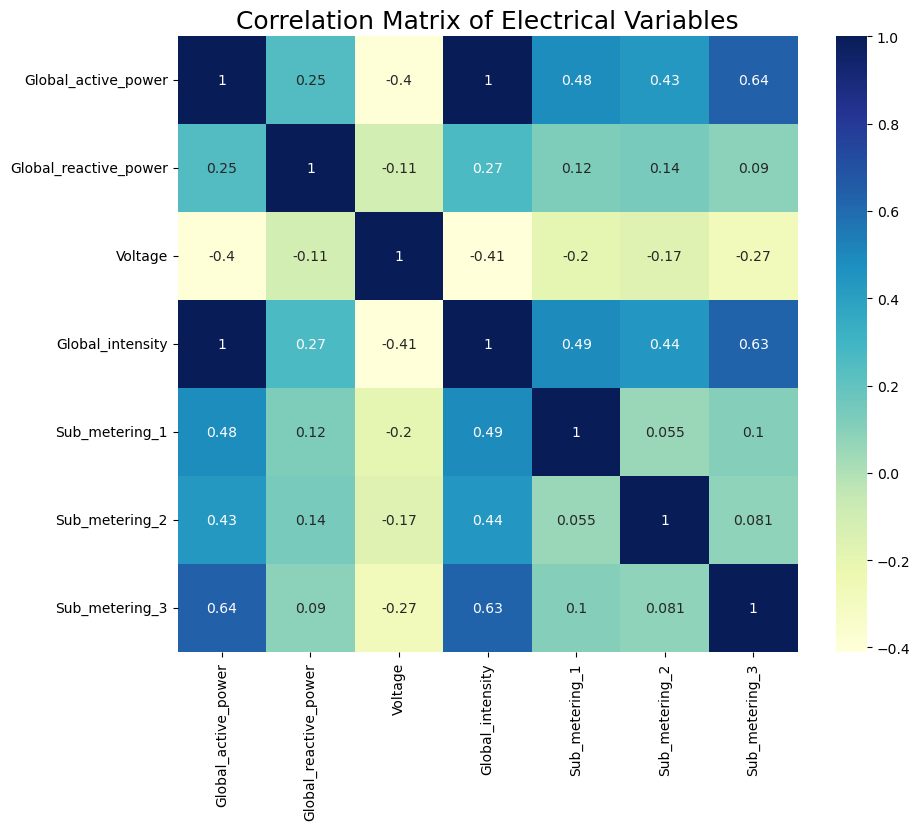

In [8]:
# Plot Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df[cols].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix of Electrical Variables', fontsize=18)
plt.show()
